<a href="https://colab.research.google.com/github/AlbertChero/QUIMICAENSM/blob/main/PracticaQuimicaEnergia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install rdkit
! pip install pyscf

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

**Determinando la energía del reactivo**

In [35]:
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)

In [36]:
mol_h = Chem.AddHs(mol)

In [37]:
Chem.AllChem.EmbedMolecule(mol_h)
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.2928    1.4707    0.3051 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3096    0.1361    0.0575 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2076   -0.5902   -0.1133 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0923    0.1401   -0.0197 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2545   -0.4291   -0.0169 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2474   -1.6725   -0.3132 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9075   -0.5013   -0.4293 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0153    1.1131   -0.5341 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2968    0.3331    1.0638 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [38]:
Chem.MolToXYZFile(mol_h,"reactivo.xyz")

In [39]:
from pyscf import gto, scf

In [40]:
mol = gto.M(atom="reactivo.xyz")
mol.basis = "3-21G"
mf = mol.KS()
mf.xc = 'b3lyp'
reactivo = mf.kernel()

converged SCF energy = -214.250425278291


In [41]:
print(reactivo)

-214.25042527829072


**Determinando la energia del producto**

In [42]:
smiles2 = "F/C=C/C"
mol1 = Chem.MolFromSmiles(smiles2)
mol_g = Chem.AddHs(mol1)

In [43]:
Chem.AllChem.EmbedMolecule(mol_g)
print(Chem.MolToMolBlock(mol_g))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5446    0.1571    0.1345 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2518   -0.2957    0.1506 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2481    0.5368   -0.1165 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1278   -0.0122   -0.0835 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0389   -1.3319    0.3803 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4711    1.5763   -0.3462 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2656   -0.7450   -0.9293 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2478   -0.6316    0.8526 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9133    0.7462   -0.0425 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [44]:
Chem.MolToXYZFile(mol_g,"producto.xyz")

In [45]:
mol9 = gto.M(atom="producto.xyz")
mol9.basis = "3-21G"
md = mol9.KS()
md.xc = 'b3lyp'
producto = md.kernel()

converged SCF energy = -214.249454218588


In [46]:
print(producto)

-214.24945421858848


**Determinando la energía del compuesto de transicion**


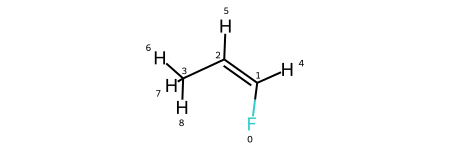

In [47]:
smiles3 = "F\C=C/C "
mol2 = Chem.MolFromSmiles(smiles3)
mol2 = Chem.AddHs(mol2)
Chem.AllChem.EmbedMolecule(mol2)
Chem.MolToXYZFile(mol2, "initial.xyz")
mol2

In [48]:
from rdkit import Chem
from rdkit.Chem import AllChem

# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(mol2.GetConformer(0),3,2,1,0,90)

# save the new conformer
Chem.MolToXYZFile(mol2, "90.xyz")

In [49]:
mol11 = gto.M(atom="90.xyz")
mol11.basis = "3-21G"
mt = mol11.KS()
mt.xc = 'b3lyp'
transicion = mt.kernel()

converged SCF energy = -214.086186163052


In [50]:
print(transicion)

-214.08618616305176


**ENERGÍA DEL REACTIVO**

In [51]:
print(reactivo)

-214.25042527829072


**ENERGÍA DEL PRODUCTO**

In [52]:
print(producto)

-214.24945421858848


**ENERGÍA DE ENTALPIA**

In [53]:
entalpia=producto-reactivo
print(entalpia)

0.0009710597022376533


**ENERGÍA DEL COMPUESTO DE TRANSICIÓN**

In [55]:
print(transicion)

-214.08618616305176


**ENERGÍA PARA LA ACTIVACIÓN DE ISOMERIZACION**

In [54]:
isomerizacion=transicion-reactivo
print(isomerizacion)

0.1642391152389564


**DETERMINAR SI ES UNA REACCION ENDOTERMICA O EXOTERMICA**

In [61]:
if(isomerizacion>0):
  print("Es una reacción endotermica")
elif(isomerizacion<0):
  print("Es una reacción exotermica")

Es una reacción endotermica
